#Лабараторныя работа №3
##Аппроксимация функций по данным измерений методом наименьших квадратов с весовыми коэфициентами

**Цель работы :**изучить методы аппроксимации при наличии ошибок в измерениях функции

####**Содержание работы** 
Производится измерение значение функции в некоторые заданные моменты времени.Вследствии погрешностей измерительной техники замер значений функции производится с ошибкой.Найти значения коэффициентов аппроксимирующего полинома МНК и спомощью этого полинома найти интерполяционное значение функции для Х=4,5 и Х=9,5.Сравнить эти значения с точными значениями функции в этих точках.Вычислить дисперсию интерполированных значений функциию

Расчетные значения моментов измерений
Х=[1;2;...;10;11]

 $$ \text{Число полиномов }  \varphi_1,\varphi_2,...,\varphi_k.$$

 $$\sigma_i = \sigma * i * 0.1$$

###**Вариант 7**
$$\text{Точное значение функции } 
{y_т=sin(e^{0.2x})}$$
$$\text{Аппроксимирующий полином } {\varphi_i=sin(i^2x)}$$
$$\text{Число функций K=3}$$
$$\sigma \text{ измерения функции } Y  \text{ равно 0.1 }$$

[[0.9395804840887779], [0.9968833611475288], [0.9685843893194684], [0.7932034804720421], [0.41078129050290885], [-0.17757749051697305], [-0.7917125712799735], [-0.971184825454585], [-0.23142076824245839], [0.8938549549128102], [0.38920138603181736]]


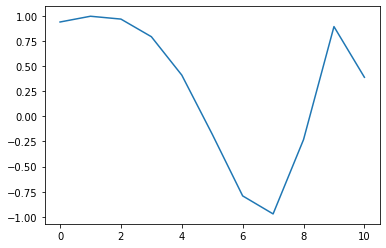

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy 
import scipy.optimize as opt
import scipy.integrate as integrate
from scipy.optimize import curve_fit

def f_T(x, a=0,b=0,c=0):
  return np.sin(np.exp(0.2*x))

def fi_1(x):
  return np.sin(x)
def fi_2(x):
  return np.sin(4*x)
def fi_3(x):
  return np.sin(9*x)

vec_x=[]
vec_y=[]
for i in range(1,12):
  vec_y.append([f_T(i)])
  vec_x.append(i)
print(vec_y)#y точные
plt.plot(vec_y)
plt.show()

sigma= [[0.010000000000000002], [0.020000000000000004], [0.030000000000000006], [0.04000000000000001], [0.05], [0.06000000000000001], [0.07], [0.08000000000000002], [0.09000000000000001], [0.1], [0.11000000000000001]]
vec_y_s =  [[0.9495804840887779], [1.0168833611475288], [0.9985843893194685], [0.8332034804720422], [0.46078129050290884], [-0.11757749051697304], [-0.7217125712799735], [-0.8911848254545849], [-0.14142076824245836], [0.9938549549128102], [0.4992013860318174]]


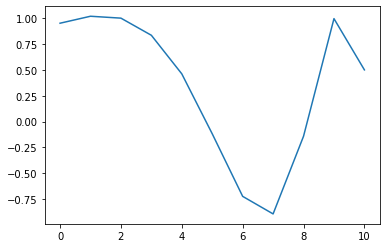

In [78]:
sigma_const=0.1

vec_sigma=[]
for i in range(1,12):
  vec_sigma.append([i*sigma_const*0.1])
print('sigma=',vec_sigma)#sigma- погрешность


vec_y_s=[]
y=[]
for i in range(0,11):
  vec_y_s.append([ vec_sigma[i][0] + vec_y[i][0] ])
  y.append( vec_sigma[i][0] + vec_y[i][0])
print('vec_y_s = ',vec_y_s)#sigma+y точное
plt.plot(vec_y_s)
plt.show()

In [79]:
K=np.zeros((11, 11))
for i in range(0,11):
  K[i][i]=pow(pow(vec_sigma[i][0],-1),2)

F=np.zeros((11, 3 ))

for i in range(0,11):
  F[i][0]=fi_1(vec_x[i])
  F[i][1]=fi_2(vec_x[i])
  F[i][2]=fi_3(vec_x[i])
print('F= ',F)

#a=np.linalg.inv(F.transpose()* K*F)*F.transpose()*K*vec_y_s
a1=F.transpose().dot(K)
a2=a1.dot(F)
a3=np.linalg.inv(a2)
a4=a3.dot(F.transpose())
a5=a4.dot(K)
a=a5.dot(vec_y_s)
print('a= ',a)

F=  [[ 0.84147098 -0.7568025   0.41211849]
 [ 0.90929743  0.98935825 -0.75098725]
 [ 0.14112001 -0.53657292  0.95637593]
 [-0.7568025  -0.28790332 -0.99177885]
 [-0.95892427  0.91294525  0.85090352]
 [-0.2794155  -0.90557836 -0.55878905]
 [ 0.6569866   0.27090579  0.1673557 ]
 [ 0.98935825  0.55142668  0.25382336]
 [ 0.41211849 -0.99177885 -0.62988799]
 [-0.54402111  0.74511316  0.89399666]
 [-0.99999021  0.01770193 -0.99920683]]
a=  [[ 0.86039342]
 [-0.14821871]
 [ 0.03009943]]


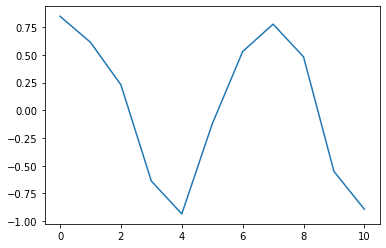

In [80]:
res=[a[0]*fi_1(i)+a[1]*fi_2(i)+a[2]*fi_3(i) for i in range(1,12)]
plt.plot(res)
plt.show()

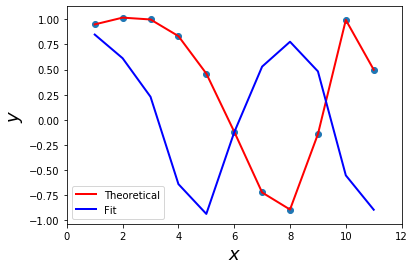

In [87]:
fig, ax = plt.subplots()
ax.scatter(vec_x, vec_y_s)
ax.plot(vec_x, y, 'r', lw=2, label="Theoretical")
ax.plot(vec_x, res, 'b', lw=2, label="Fit")
ax.legend()
ax.set_xlim(0, 12)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
plt.show()